# DataCamp  (Python)

##     Machine Learning with Tree-Based Models in Python


In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Machine Learning with Tree-Based Models in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from mlxtend.plotting import plot_decision_regions

In [3]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import VotingClassifier, BaggingClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingRegressor

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error as MSE


##    CHAPTER 1  - Classification And Regression Trees (CART)


#### Exercício 1 - Decision Tree for Classification

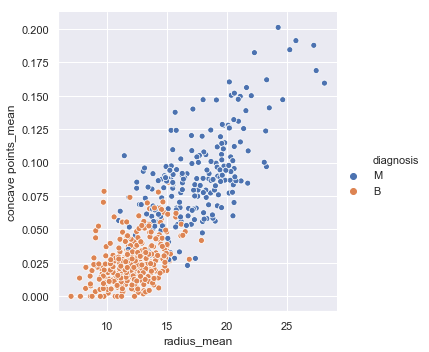

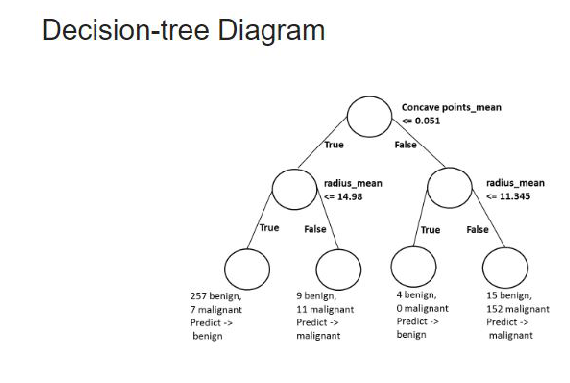

Accuracy of the decision tree: 0.9035087719298246


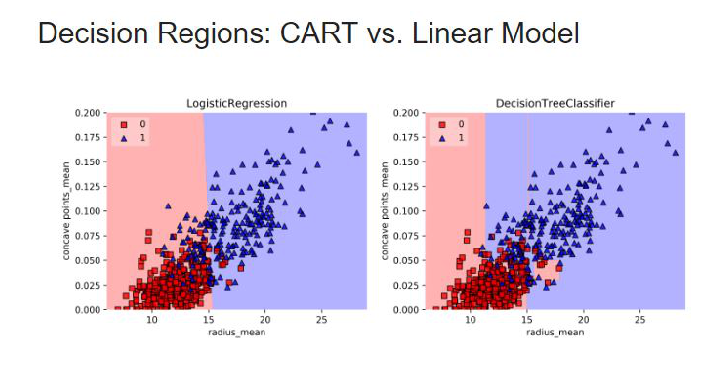

In [4]:
#vídeo

# Classification-tree:

#  ----> Sequence of if-else questions about individual features.
#  Objective: infer class labels.
#  Able to capture non-linear relationships between features and labels.
#  Don't require feature scaling (ex: Standardization, ..)

# Breast Cancer Dataset in 2D
wbc = pd.read_csv(data_folder + "wbc.csv")
sns.relplot('radius_mean', 'concave points_mean', data=wbc, hue='diagnosis')
plt.show()

# Decision tree diagram
image = plt.imread(data_folder + "decision_tree_diagram.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.8, top=1, wspace=0, hspace=0)
plt.show()

# the veredict takes into account the majority
# maximum depth = 2 neste caso

######################################################################################

# Classification-tree in scikit-learn

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score

X = wbc[['radius_mean', 'concave points_mean']].values
y = wbc.diagnosis.values

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
# stratify=y ---> so that the train and test sets have the same proportion of class labels

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
# random_state=1 --> para efetos de reproducibilidade

# Fit dt to the training set
dt.fit(X_train,y_train) 

# Predict test set labels
y_pred = dt.predict(X_test)

# Evaluate test-set accuracy
print("Accuracy of the decision tree:", accuracy_score(y_test, y_pred))

################################################################################

# Decision Regions

# Decision region: region in the feature space where all instances are assigned to one class label.
# Decision Boundary: surface separating different decision regions.
image = plt.imread(data_folder + "decision_regions.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.8, top=1, wspace=0, hspace=0)
plt.show()


Exercício 2

In [5]:
# Train your first classification tree

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Breast Cancer Dataset in 2D
wbc = pd.read_csv(data_folder + "wbc.csv")
X = wbc[['radius_mean', 'concave points_mean']].values
y = wbc.diagnosis.values

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)


SEED = 1

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

['B' 'B' 'B' 'M' 'B']


Exercício 3

In [6]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


Exercício 4

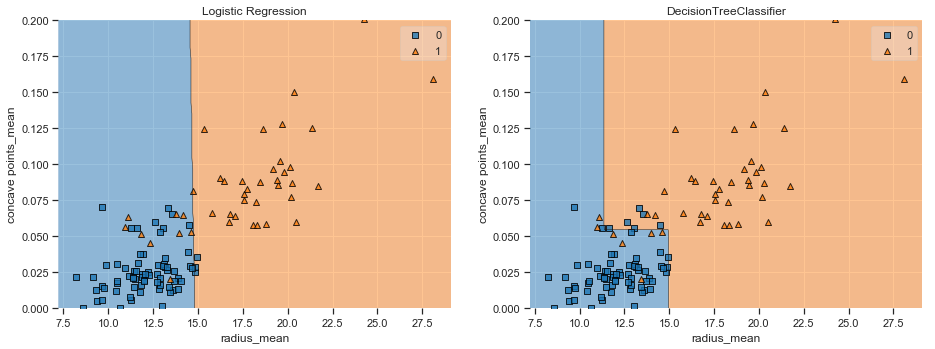

In [7]:
# Logistic regression vs classification tree

# A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic
# regression produces only a single linear decision boundary dividing the feature space into two decision regions.
# We have written a custom function called -- 'plot_labeled_decision_regions()' -- that you can use to plot the decision
# regions of a list containing two trained classifiers. 

# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(solver='lbfgs', random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers:
# plot_labeled_decision_regions(X_test, y_test, clfs)   #-----> esta é a editada por eles


#############################################################################################

# Ploting the decision boundaries
from mlxtend.plotting import plot_decision_regions

X = wbc[['radius_mean', 'concave points_mean']].values
y = wbc.diagnosis.values
y_trans = np.array([1 if i == 'M' else 0 for i in y])    # converti para 1's ('M') e 0's ('F')

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size=0.2, stratify=y, random_state=1)

# DecisionTree classifier
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
dt.fit(X_train,y_train) 

# LogisticRegression classifier
logreg = LogisticRegression(solver='lbfgs', random_state=1)
logreg.fit(X_train, y_train)

# Logistic Regression decision boundary
plt.subplot(1, 2, 1)
plot_decision_regions(X_test, y_test, clf=logreg)  #<-----------
plt.title("Logistic Regression")
plt.xlabel("radius_mean")
plt.ylabel("concave points_mean")
plt.ylim(0, 0.2)

# Decision Tree decision boundary
plt.subplot(1, 2, 2)
plot_decision_regions(X_test, y_test, clf=dt)  #<-----------
plt.title("DecisionTreeClassifier")
plt.xlabel("radius_mean")
plt.ylabel("concave points_mean")
plt.ylim(0, 0.2)

# plot both
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0)
plt.show()

# Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the
# classification tree divide the feature space into rectangular regions.

#### Exercício 5 - Classification tree Learning

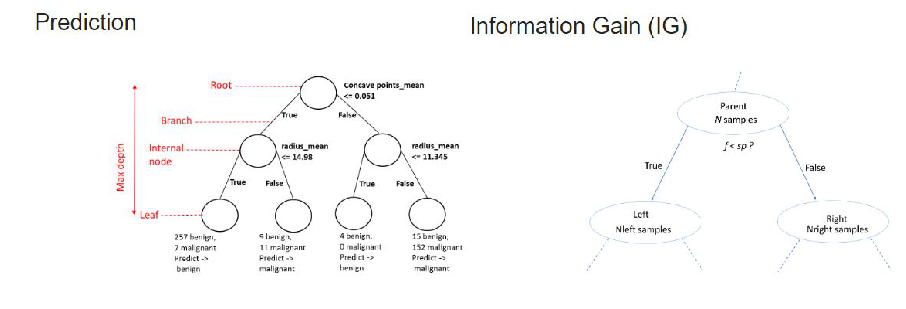

0.9210526315789473

In [8]:
#vídeo 
# como é q o algoritmo aprende com os dados? / classification tree learning

# Building Blocks of a Decision-Tree

# Decision-Tree: data structure consisting of a hierarchy of nodes.
# Node: question or prediction. ---

# Three kinds of nodes:
#   Root: no parent node, question giving rise to two children nodes.
#     Internal node: one parent node, question giving rise to two children nodes.
#   Leaf: one parent node, no children nodes --> prediction.

# como é que a classificationTree produz as folhas/leafs mais puras possíveis? -----> conceito de 'information gain'
plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "prediction.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "information_gain.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.4, right=2, top=1, wspace=0, hspace=0)
plt.show()

# how does it know which feature (f) to choose and which split point (sp) ? ---> by Maximizing information gain

######### Quantifying uncertainty:
#               Information gain: how much the question reduces uncertainty the most   
#               Impurity/ Gini index: how much uncertainty there is in the node/split points

# Impurity: chance of making misclassifications in the set
#  ex.: Gini impurity = (picking red) * (chance of macking an error) + (picking blue) * (chance of macking an error) + ...

# Information Gain: the best question to ask
#   it's just a number that says how much a question (feature) helps that
#   lógica: 
#       1) we have the level of 'impurity' in the starting set (parent node).  ex: 0.64
#       2) para cada pergunta que podemos fazer (que cor é, é menor do que x, etc) calcula-se a 'impurity' resultante
#       3) tiramos a média da 'impurity' dos 2 child nodes.  ex: (4/5 * 0.62) + (1/5 * 0) = 0.5
#       4) subtraímos isso ao nível de 'impurity' inicial/parent (0.64) e dá o nosso 'Information Gain' (0.64 - 0.5 = 0.14)

###################################################################### !!

# Instantiate dt, set 'criterion' to 'gini'
dt = DecisionTreeClassifier(criterion='gini', random_state=1)
# criterion: The function to measure the quality of a split. 
# Supported criteria are “gini” for the Gini impurity, and “entropy” for the information gain.

dt.fit(X_train,y_train)

y_pred= dt.predict(X_test)

accuracy_score(y_test, y_pred)

Exercício 6

In [9]:
# Growing a classification tree

# In the video, you saw that the growth of an unconstrained classification tree followed a few simple rules. 
# Which of the following is not one of these rules?

# The existence of a node depends on the state of its predecessors. (True)
# The impurity of a node can be determined using different criteria such as entropy and the gini-index. (True)
# When the information gain resulting from splitting a node is null, the node is declared as a leaf. (True)
# When an internal node is split, the split is performed in such a way so that information gain is minimized. (False)

Exercício 7

In [10]:
# Using entropy as a criterion

wbc = pd.read_csv(data_folder + "wbc.csv")
X = wbc[['radius_mean', 'concave points_mean']].values
y = wbc.diagnosis.values

# Import modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Next: compare with another tree trained using the gini-index as the information criterion.

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

Exercício 8

In [11]:
# Entropy vs Gini index

######################################

# Using Gini as a criterion

# Instantiate dt_gini, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_gini to the training set
dt_gini.fit(X_train, y_train)

######################################

# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy and dt_gini to predict test set labels
y_pred_entropy = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# Evaluate accuracy_entropy & accuracy_gini
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

# normalmente dão o mesmo. o gini é o utilizado por default

Accuracy achieved by using entropy:  0.8859649122807017
Accuracy achieved by using the gini index:  0.9210526315789473


#### Exercício 9 - Decision tree for Regression

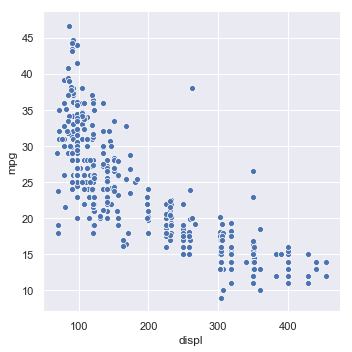

Mean squared error (MSE): 4.697042846107747

Information Criterion for Regression-Tree:
        in regression the impurity of the node is measured by computing the MSE of the targets in that node
        the regression tree tries to find the splits that produce the leafs where in each leaf the target values are
        on average the closest possible to the mean value of the labels in that particular leaf

Prediction: As a new instance traverses the tree and reaches a certain leaf, its target variable y is computed 
        as the average of the target variables contained in that leaf.


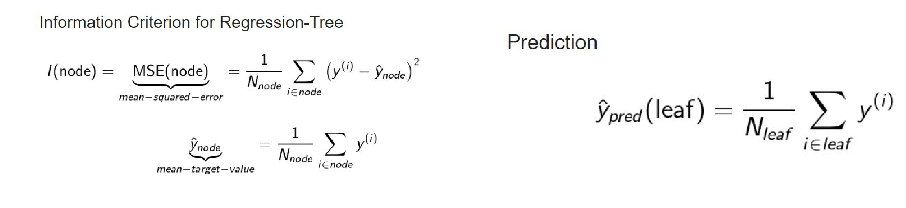

To highlight the importance of the flexibility of regression trees:


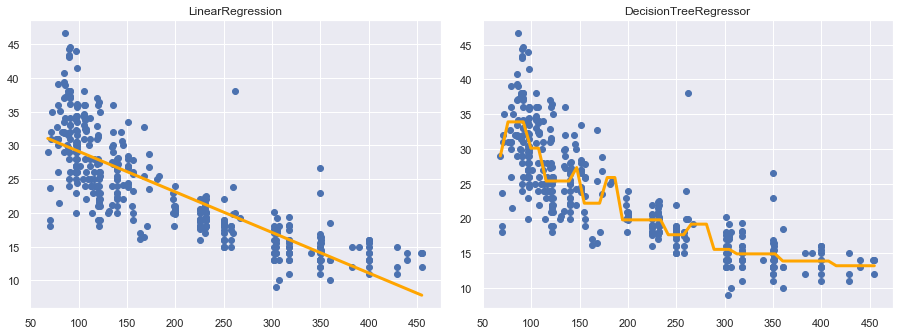

the DecisionTreeRegressor captures better the non-linearity, although not fully


In [12]:
#vídeo   

# Regression - the target variable is continuous

# Auto-mpg Dataset
auto = pd.read_csv(data_folder + "auto.csv")

# Task: predict the miles per gallon (mpg) - target taking into account the other variables

# Auto-mpg with one feature
sns.relplot('displ', 'mpg', data=auto)
plt.show()

# linear models such as Linear Regression would not capture such (non-linear) behavior

# Regression-Tree in scikit-learn

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

auto_dummies = pd.get_dummies(auto)

y = auto_dummies['mpg'].values
X = auto_dummies.drop('mpg', axis=1).values

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=3)

# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)
# min_samples_leaf=0.1 ---> impose condition in which each leaf has to contain at least 10% of the training data

# Fit 'dt' to the training-set
dt.fit(X_train, y_train)

# Predict test-set labels
y_pred = dt.predict(X_test)


# Compute test-set RMSE 
rmse_dt = MSE(y_test, y_pred) ** (1/2)

print("Mean squared error (MSE):", rmse_dt)

#################################################################

# Information Criterion for Regression-Tree & Prediction
print("""\nInformation Criterion for Regression-Tree:
        in regression the impurity of the node is measured by computing the MSE of the targets in that node
        the regression tree tries to find the splits that produce the leafs where in each leaf the target values are
        on average the closest possible to the mean value of the labels in that particular leaf""")

print("""\nPrediction: As a new instance traverses the tree and reaches a certain leaf, its target variable y is computed 
        as the average of the target variables contained in that leaf.""")

plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "information_criterion_regression.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "regression_prediction.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.4, right=2, top=1, wspace=0.2, hspace=0)
plt.show()

##################################################################3

# Linear Regression vs. Regression-Tree

print("To highlight the importance of the flexibility of regression trees:")

y = auto['mpg'].values
X_displ = auto['displ'].values

y = y.reshape(-1, 1)
X_displ = X_displ.reshape(-1, 1)

# Linear Regression
plt.subplot(1, 2, 1)
linreg = LinearRegression()
linreg.fit(X_displ, y)
prediction_space = np.linspace(min(X_displ), max(X_displ)).reshape(-1, 1)
plt.scatter(auto['displ'], auto['mpg'])
plt.plot(prediction_space, linreg.predict(prediction_space), color='orange', linewidth=3)
plt.title("LinearRegression")

# DecisionTreeRegressor
plt.subplot(1, 2, 2)
dt = DecisionTreeRegressor(max_depth=4, random_state=3)  # min_samples_leaf=0.1, 
dt.fit(X_displ, y)
prediction_space = np.linspace(min(X_displ), max(X_displ)).reshape(-1, 1)
plt.scatter(auto['displ'], auto['mpg'])
plt.plot(prediction_space, dt.predict(prediction_space), color='orange', linewidth=3)
plt.title("DecisionTreeRegressor")

# plot both
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.1, hspace=0)
plt.show()

print("the DecisionTreeRegressor captures better the non-linearity, although not fully")

Exercício 10

In [13]:
# Train your first regression tree

# Auto-mpg Dataset
auto = pd.read_csv(data_folder + "auto.csv")
auto_dummies = pd.get_dummies(auto)

y = auto_dummies['mpg'].values
X = auto_dummies.drop('mpg', axis=1).values
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=3)

#######################################################################

# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.13,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

Exercício 11

In [14]:
# Evaluate the regression tree

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))


Test set RMSE of dt: 4.37


Exercício 12

In [15]:
# Linear regression vs regression tree

# Linear regression & fit
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** (1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))


Linear Regression test set RMSE: 5.10
Regression Tree test set RMSE: 4.37


# CHAPTER 2 - The Bias-Variance Tradeoff


#### Exercício 1 - Generalization Error

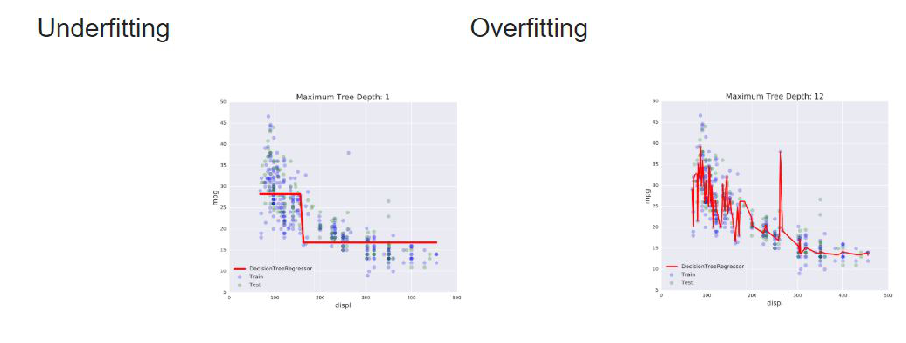

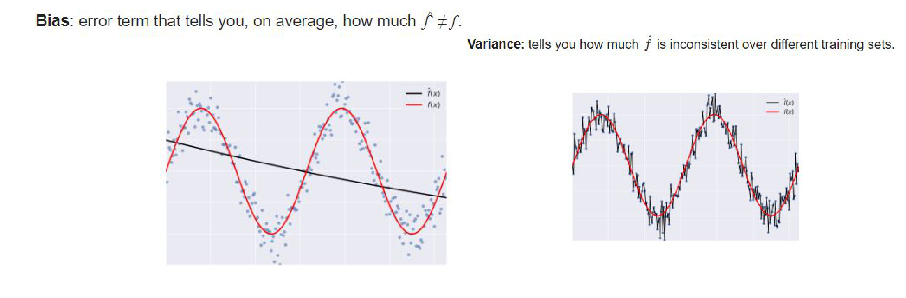

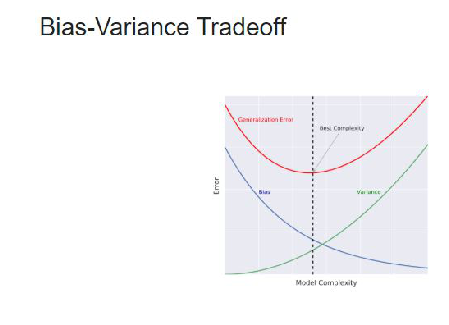

In [16]:
#vídeo

# Generalization error

# Supervised Learning - Under the Hood
# Supervised Learning: y =f(x), f is unknown.

# Goals of Supervised Learning:
# Find a model f^ that best approximates f
# f^ can be Logistic Regression, Decision Tree, Neural Network ...
# Discard noise as much as possible.
# End goal: f^ should acheive a low predictive error on unseen datasets.

# Difficulties in approximating f:
#   Overfitting:  f^(x) fits the training set noise.
#   Underfitting: f^(x) is not flexible enough to approximate f.
plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "underfitting.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "overfitting.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.4, right=2, top=1, wspace=0, hspace=0)
plt.show()

# Generalization Error

# Generalization Error of f^: Does f^ generalize well on unseen data?
# It can be decomposed as follows:

########################################################################
# | Generalization Error of f^ = bias^2 + variance + irreducible error |   <-----------------
########################################################################

# Bias
# Bias: error term that tells you, on average, how much f^ differs from f. 
# High bias models lead to underfitting

# Variance
# Variance: tells you how much f^ is inconsistent over different training sets.
# High variance leads to overfitting

plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "bias.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "variance.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.4, right=2, top=1, wspace=0, hspace=0)
plt.show()

#############################################3

# Model complexity

# Model Complexity: sets the flexibility of f^
# Example: Maximum tree depth, Minimum samples per leaf, ... --> increasing each increases the complexity of the model

# Bias-variance tradeoff
image = plt.imread(data_folder + "bias_variance_trade_off.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()



Exercício 2

In [17]:
# Complexity, bias and variance

# Which of the following correctly describes the relationship between f^'s complexity and f^'s bias and variance terms?


# As the complexity of f^ decreases, the bias term decreases while the variance term increases. 
# As the complexity of f^ decreases, both the bias and the variance terms increase.
# As the complexity of f^ increases, the bias term increases while the variance term decreases. 
# As the complexity of f^ increases, the bias term decreases while the variance term increases.  (True)


Exercício 3

In [18]:
# Overfitting and underfitting

# B (gráfico acima do underfitting) suffers from high bias and underfits the training set.

#### Exercício 4 - Diagnose bias and variance problems

In [19]:
#vídeo

# Estimating the Generalization Error

# How do we estimate the generalization error of a model?
#  Cannot be done directly because:  f is unknown, usually you only have one dataset, noise is unpredictable.

# Solution:
#  Split the data to training and test sets,
#  fit f^ to the training set, evaluate the error of f^ on the unseen test set.
#  hence ---> the generalization error of f^ ≈ test set error of f^

# Better Model Evaluation with Cross-Validation
#  Test set should not be touched until we are confident about f^'s performance.
#  Evaluating f^ on training set: biased estimate, f^ has already seen all training points.
#  Solution ---> Cross-Validation (CV):
#     K-Fold CV (vamos ver este)
#     Hold-Out CV.

# k-fold CV: the CV error can equal the mean of all the errors (podíamos fazer intervalos de confiança e std's tb)

###################################

# Diagnose Variance Problems
#   If (CV error of f^) > (training set error of f^):  f^ suffers from high variance
#   f^ is said to overfit the training set. To remedy overfitting:
#  - decrease model complexity
#  - for ex: decrease max depth, increase min samples per leaf, ...
#  - gather more data, ..

# Diagnose Bias Problems
# if f^ suffers from high bias: CV error of f^ ≈ training set error of f^ >>> desired error.
# f^ is said to underfit the training set. To remedy underfitting:
#  - increase model complexity
#  - for ex: increase max depth, decrease min samples per leaf, ...
#  - gather more relevant features

######################################

# K-Fold CV in sklearn on the Auto Dataset
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

# Auto-mpg Dataset
auto = pd.read_csv(data_folder + "auto.csv")
auto_dummies = pd.get_dummies(auto)

y = auto_dummies['mpg'].values
X = auto_dummies.drop('mpg', axis=1).values

# Set seed for reproducibility
SEED = 123

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate decision tree regressor and assign it to 'dt'
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=SEED)


# Evaluate the list of MSE ontained by 10-fold CV 
# Set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV = - cross_val_score(dt, X_train, y_train, cv= 10, scoring='neg_mean_squared_error', n_jobs = -1)

# ----------> não dá para calcular o MSE diretamente com o cross_val_score, por isso usamos - 'neg_mean_squared_error'
# n_jobs = -1 --> The number of CPUs to use to do the computation (1 default). -1 means using all processors.


# Fit 'dt' to the training set                        
dt.fit(X_train, y_train)

# Predict the labels of training set
y_predict_train = dt.predict(X_train)

# Predict the labels of test set
y_predict_test = dt.predict(X_test)

# CV MSE  
print('10-fold CV MSE: {:.2f}'.format(MSE_CV.mean()))

# Training set MSE
print('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))

# Test set MSE
print('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))

print("Given that TrainMSE < 10-fold CV MSE, dt overfits the training set --> dt has high variance")
print("it used (max_depth=4, min_samples_leaf=0.14)")

10-fold CV MSE: 20.51
Train MSE: 15.30
Test MSE: 20.92
Given that TrainMSE < 10-fold CV MSE, dt overfits the training set --> dt has high variance
it used (max_depth=4, min_samples_leaf=0.14)


Exercício 5

In [20]:
# Instantiate the model

# Auto-mpg Dataset
auto = pd.read_csv(data_folder + "auto.csv")
auto_dummies = pd.get_dummies(auto)

y = auto_dummies['mpg'].values
X = auto_dummies.drop('mpg', axis=1).values
##############################################################

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt with max depth 4 and min_samples_leaf set to 0.26
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

# max_depth --> número de partições máximo
# min_samples_leaf=0.26 ---> each leaf has to contain at least 26% of the training data

Exercício 6

In [21]:
# Evaluate the 10-fold CV error

from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(0.5)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# A very good practice is to keep the test set untouched until you are confident about your model's performance. 
# CV is a great technique to get an estimate of a model's performance without affecting the test set.

CV RMSE: 5.14


Exercício 7

In [22]:
# Evaluate the training error

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(0.5)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

# Notice how the training error is roughly equal to the 10-folds CV error you obtained in the previous exercice.

Train RMSE: 5.15


Exercício 8

In [23]:
# High bias or high variance?

# In this exercise you'll diagnose whether the regression tree dt you trained in the previous exercise suffers from a
# bias or a variance problem.

# baseline_RMSE corresponds to the minimum desired RMSE. 
# baseline_RMSE corresponds to the error achieved by a regression-tree trained with the disp feature only 

baseline_RMSE = 5.1

# Does dt suffer from a high bias or a high variance problem?

# 1) dt suffers from high variance because RMSE_CV is far less than RMSE_train.
# 2) dt suffers from high bias because RMSE_CV ≈ RMSE_train and both scores are greater than baseline_RMSE. --> (True)
# 3) dt is a good fit because RMSE_CV ≈ RMSE_train and both scores are smaller than baseline_RMSE.


# ----> dt is indeed underfitting the training set as the model is too constrained to capture the nonlinear dependencies
#       between features and labels.

#### Exercício 9 - Ensemble learning

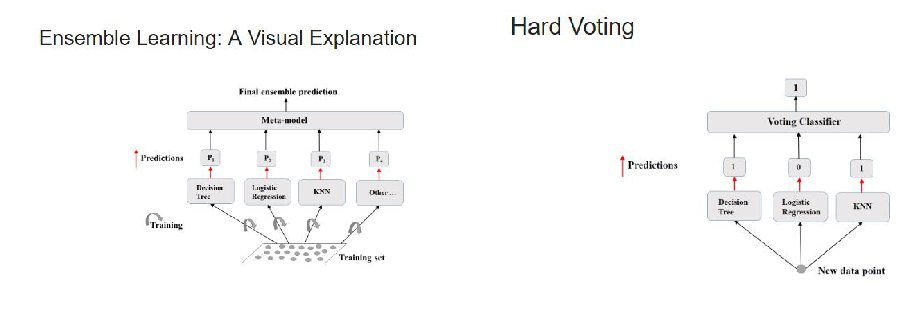

Logistic Regression : 0.848
K Nearest Neighbours : 0.883
Classification Tree : 0.901

Voting Classifier: 0.8947368421052632


In [24]:
#vídeo

# Advantages of CARTs:
#  Simple to understand.
#  Simple to interpret.
#  Easy to use.
#  Flexibility: ability to describe non-linear dependencies.
#  Preprocessing: no need to standardize or normalize features, ...

# Limitations of CARTs
#   Classification: can only produce orthogonal decision boundaries.
#   Sensitive to small variations in the training set.
#   High variance: unconstrained CARTs may overfit the training set.
#   Solution: ensemble learning.

################################################################

# Ensemble Learning

# Train different models on the same dataset.
# Let each model make its predictions
# Meta-model: aggregates predictions of individual models.
# Final prediction: more robust and less prone to errors.
# Best results: models are skillful in different ways.

plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "ensemble_learning.jpg")
plt.axis('off')
plt.imshow(image)


# Ensemble Learning in Practice: Voting Classifier
#  Binary classification task.
# N classifiers make predictions: P_1, P_2, ... P_N, with Pi = 0 or 1
#  Meta-model prediction: hard voting.

plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "hard_voting.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.4, right=2, top=1, wspace=0.2, hspace=0)
plt.show()

##################################################################

# Voting Classifier in sklearn (Breast-Cancer dataset)
wbc = pd.read_csv(data_folder + "wbc.csv")

X = wbc[['radius_mean', 'concave points_mean']].values
y = wbc.diagnosis.values

X_trans = wbc.drop(['diagnosis', 'Unnamed: 32'], axis=1).values
y_trans = np.array([1 if i == 'M' else 0 for i in y])    # converti para 1's ('M') e 0's ('F')

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Import the VotingClassifier meta-model
from sklearn.ensemble import VotingClassifier

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size= 0.3, random_state= SEED)

# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED, solver='lbfgs')
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=SEED)

# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:   
    
    #fit clf to the training set
    clf.fit(X_train, y_train)    

    # Predict the labels of the test set
    y_pred = clf.predict(X_test)

    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))


# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)     

# Fit 'vc' to the traing set
vc.fit(X_train, y_train)   

# Predict test set labels
y_pred = vc.predict(X_test)

# Evaluate the test-set accuracy of 'vc'
print('\nVoting Classifier: {}'.format(accuracy_score(y_test, y_pred)))


Exercício 10

In [25]:
# Define the ensemble

ilpd = pd.read_csv(data_folder + "indian_liver_patient_preprocessed.csv")

y = ilpd['Liver_disease'].values
X = ilpd.drop('Liver_disease', axis=1).values

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED, solver='lbfgs', max_iter=10000)

# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]


Exercício 11

In [26]:
# Evaluate individual classifiers

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= SEED)

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))


Logistic Regression : 0.747
K Nearest Neighbours : 0.724
Classification Tree : 0.730


Exercício 12

In [27]:
# Better performance with a Voting Classifier

# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy), "   <-- better performance than any of the classifiers above")

Voting Classifier: 0.759    <-- better performance than any of the classifiers above


# Chapter 3 - Bagging and Random Forests


#### Exercício 1 - Bagging

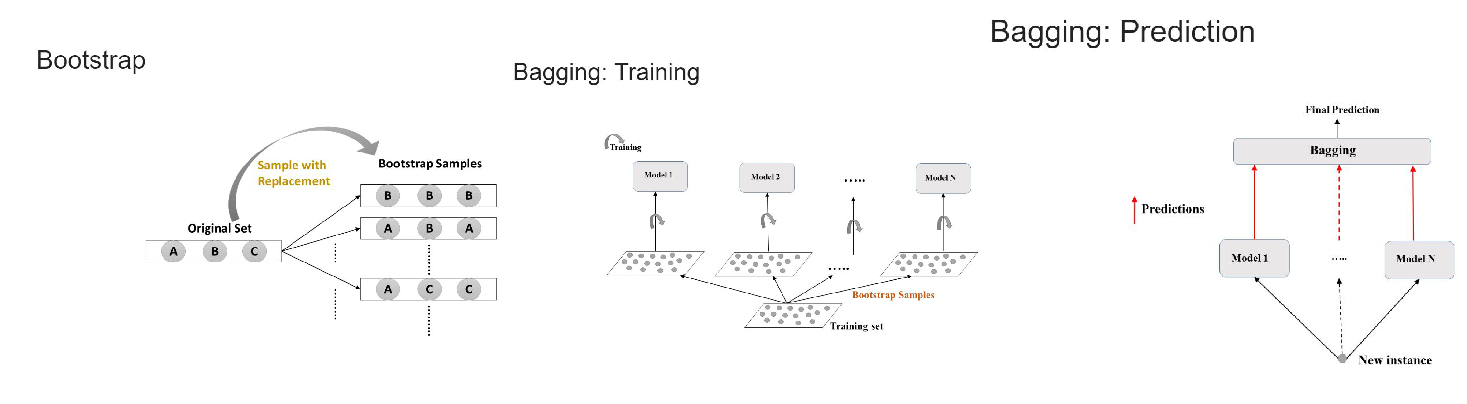

Accuracy of Bagging Classifier: 0.936
dt accuracy: 0.889


In [28]:
#vídeo

# Bootstrap AGGregatING (it's an ensemble method)

# Ensemble Methods

# 1) Voting Classifier
#      same training set + different algorithms.

# 2) Bagging
#      one algorithm + different subsets of the training set.

# Bagging: Bootstrap Aggregation.
# Uses a technique known as the bootsrap.
# Reduces variance of individual models in the ensemble.

plt.subplot(1, 3, 1)
image = plt.imread(data_folder + "bootstrap.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplot(1, 3, 2)
image = plt.imread(data_folder + "bagging_training.jpg")    # ----------------------> They use the same algorithm
plt.axis('off')
plt.imshow(image)
plt.subplot(1, 3, 3)
image = plt.imread(data_folder + "bagging_prediction.jpg") # ------output------> in classification: majority voting
plt.axis('off')                                            # ------output------> in regression: average
plt.imshow(image)
plt.subplots_adjust(left=-0.5, bottom=-1.2, right=2.8, top=1, wspace=0.01, hspace=0)
plt.show()

# Bagging: Classification & Regression

# Classification:
#   - Aggregates predictions by majority voting.
#   - BaggingClassifier in scikit-learn.

# Regression:
#   - Aggregates predictions through averaging.
#   - BaggingRegressor in scikit-learn.

###############################################################################

# Bagging Classifier in sklearn (Breast-Cancer dataset)

wbc = pd.read_csv(data_folder + "wbc.csv")

#X = wbc[['radius_mean', 'concave points_mean']].values
y = wbc.diagnosis.values
X_trans = wbc.drop(['diagnosis', 'Unnamed: 32'], axis=1).values
y_trans = np.array([1 if i == 'M' else 0 for i in y])    # converti para 1's ('M') e 0's ('F')

# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.3, stratify=y, random_state=SEED)
            # stratify=y ---> so that the train and test sets have the same proportion of class labels

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1) # 300 classification trees dt ## n_jobs=-1 to use all

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

# meu -- dt only
dt.fit(X_train, y_train)
print("dt accuracy:", round(accuracy_score(y_test, dt.predict(X_test)), 3))

Exercício 2

In [29]:
# Define the bagging classifier

# Indian Liver Patient dataset
ilpd = pd.read_csv(data_folder + "indian_liver_patient_preprocessed.csv")

y = ilpd['Liver_disease'].values
X = ilpd.drop('Liver_disease', axis=1).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

###########################################################

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)


Exercício 3

In [30]:
# Evaluate Bagging performance

from sklearn.metrics import accuracy_score

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

# dt accuracy
dt.fit(X_train, y_train)
print("dt accuracy:", round(accuracy_score(y_test, dt.predict(X_test)), 2))

Test set accuracy of bc: 0.71
dt accuracy: 0.63


#### Exercício 4 - Out of Bag Evaluation

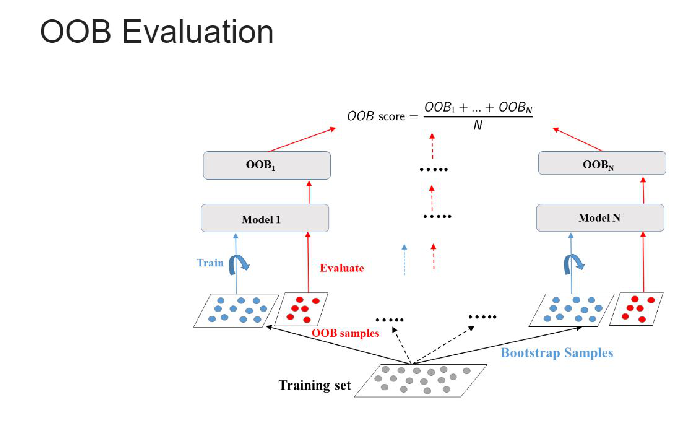

Test set accuracy: 0.936
OOB accuracy: 0.920

test set score (accuracy in this case) and oob score are somewhat similar whenever we run the model.
     These results highlight how OOB Evaluation can be an efficient technique to obtain a performance
     estimate of a bagged ensemble on unseen data without performing cross-validation.


In [31]:
#vídeo

# Bagging
# some instances may be sampled several times for one model, other instances may not be sampled at all.

# Out Of Bag (OOB) instances
# On average, for each model, 63% of the training instances are sampled. -------> isto pode ser demonstrado --> ver
# The remaining 37% constitute the OOB instances.
#   --> since the OOB instances are not seen by the model in training, they can be used to estimate the performance
#       of the ensemble without the need for cross-validation ---> this is known as "OOB Evaluation"

image = plt.imread(data_folder + "oob_evaluation.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.5, right=1.5, top=1, wspace=0, hspace=0)
plt.show()
###########################################################

# OOB Evaluation in sklearn (Breast Cancer Dataset)
wbc = pd.read_csv(data_folder + "wbc.csv")

X = wbc[['radius_mean', 'concave points_mean']].values
y = wbc.diagnosis.values
X_trans = wbc.drop(['diagnosis', 'Unnamed: 32'], axis=1).values
y_trans = np.array([1 if i == 'M' else 0 for i in y])    # converti para 1's ('M') e 0's ('F')

# Import models and split utility function
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size= 0.3, stratify= y, random_state=SEED)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'; set oob_score= True 
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)    

# ---> oob_score=True ----> in sklearn, the oob_score corresponds to accuracy for classifiers and R^2 for regressors

# Fit 'bc' to the traing set
bc.fit(X_train, y_train)

# Predict the test set labels
y_pred = bc.predict(X_test)


# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_

# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))

# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))   

print("""\ntest set score (accuracy in this case) and oob score are somewhat similar whenever we run the model.
     These results highlight how OOB Evaluation can be an efficient technique to obtain a performance
     estimate of a bagged ensemble on unseen data without performing cross-validation.""")

Exercício 5

In [32]:
# Prepare the ground

# Indian Liver Patient dataset
ilpd = pd.read_csv(data_folder + "indian_liver_patient_preprocessed.csv")

y = ilpd['Liver_disease'].values
X = ilpd.drop('Liver_disease', axis=1).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
###########################################################

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, oob_score=True, random_state=1)


Exercício 6

In [33]:
# OOB Score vs Test Set Score

from sklearn.metrics import accuracy_score

# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f} | OOB accuracy: {:.3f}'.format(acc_test, acc_oob))


Test set accuracy: 0.690 | OOB accuracy: 0.708


#### Exercício 7 - Random Forests

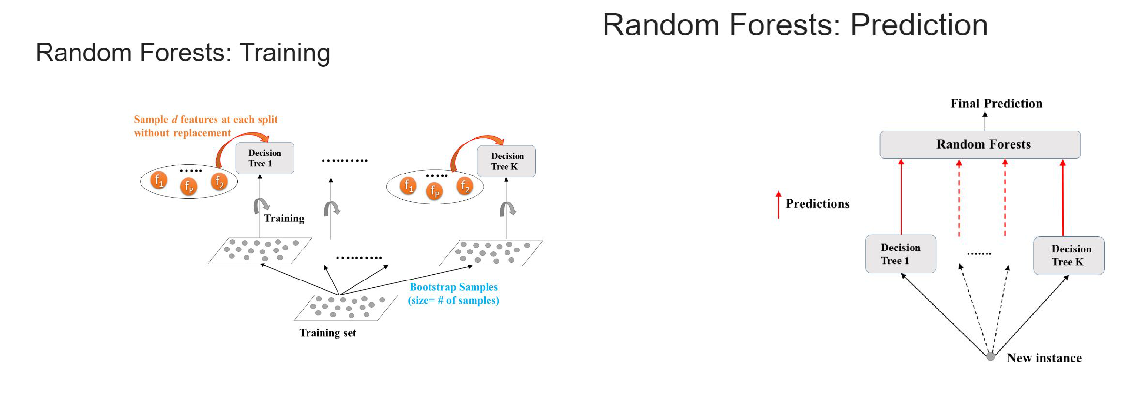

Random Forests: Training - Notice how each tree forming the ensemble is trained on a different bootstrap sample
    from the training set. In addition, when a tree is trained, at each node, only d features are sampled from all features
    without replacement. The node is then split using the sampled features that maximizes information gain.
    In sklearn, d = m**0.5 = (square root of the number of features). --> para 'descorrelacionar'.
    Classification: Aggregates predictions by majority voting. Regression: Aggregates predictions through averaging.
In general, the RandomForestClassifier/Regressor achieves a lower variance than individual trees

Test set RMSE of Random Forest Regressor: 3.98
Test set RMSE achieved by a single regressiontree: 4.432983766819364

Feature importance: [0.40037662 0.16742975 0.18874527 0.00002437 0.24342399 0.
 0.         0.        ]


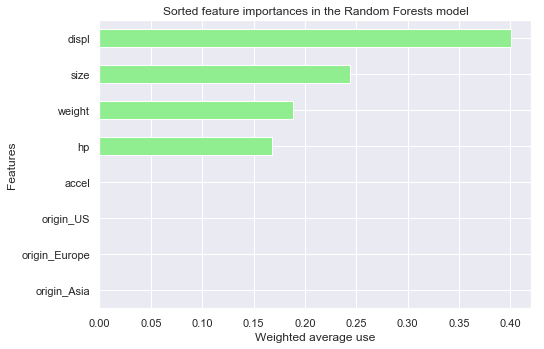

origin_Asia      0.000000
origin_Europe    0.000000
origin_US        0.000000
accel            0.000024
hp               0.167430
weight           0.188745
size             0.243424
displ            0.400377
dtype: float64

In [34]:
#vídeo

# Bagging:
# Base estimator: Decision Tree, Logistic Regression, Neural Net, ...
# Each estimator is trained on a distinct bootstrap sample of the training set
# Estimators use all features for training and prediction ---> All


# Further Diversity with Random Forests:
# Base estimator: Decision Tree
# Each estimator is trained on a different bootstrap sample having the same size as the training set
# --> RF introduces further randomization in the training of individual trees
# --> d features are sampled at each node without replacement (d < total number of features)

################################################################
plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "random_forests_training.jpg") 
plt.axis('off')
plt.imshow(image)

plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "random_forests_prediction.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.6, right=2.5, top=1, wspace=0.1, hspace=0)
plt.show()

print("""Random Forests: Training - Notice how each tree forming the ensemble is trained on a different bootstrap sample
    from the training set. In addition, when a tree is trained, at each node, only d features are sampled from all features
    without replacement. The node is then split using the sampled features that maximizes information gain.
    In sklearn, d = m**0.5 = (square root of the number of features). --> para 'descorrelacionar'.
    Classification: Aggregates predictions by majority voting. Regression: Aggregates predictions through averaging.""")
##################################################################

# Random Forests: Classification & Regression

# Classification:
#  - Aggregates predictions by majority voting
#  - RandomForestClassifier in scikit-learn

# Regression:
#  - Aggregates predictions through averaging
#  - RandomForestRegressor in scikit-learn

print("In general, the RandomForestClassifier/Regressor achieves a lower variance than individual trees")

###########################################################################

# Random Forests Regressor in sklearn (auto dataset)

auto = pd.read_csv(data_folder + "auto.csv")
auto_dummies = pd.get_dummies(auto)
y = auto_dummies['mpg'].values
X = auto_dummies.drop('mpg', axis=1).values

# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)
# min_samples_leaf so that each leaf contains at least 12% of the data used in training

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('\nTest set RMSE of Random Forest Regressor: {:.2f}'.format(rmse_test))

# single regression tree RMSE
dt = DecisionTreeRegressor(min_samples_leaf=0.12, random_state=SEED)
dt.fit(X_train, y_train)
print("Test set RMSE achieved by a single regressiontree:", MSE(y_test, dt.predict(X_test))**0.5)

####################################

# Feature Importance (it is expressed as a percentage)

# Tree-based methods: enable measuring the importance of each feature in prediction.
# In sklearn:
#   - how much the tree nodes use a particular feature (weighted average) to reduce impurity
#   - accessed using the attribute 'feature_importances_'

np.set_printoptions(suppress=True)
print("\nFeature importance:", rf.feature_importances_)

# Feature Importance in sklearn

# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = auto_dummies.drop('mpg', axis=1).columns)

# Sort importances_rf                                   
sorted_importances_rf = importances_rf.sort_values()       

# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.title("Sorted feature importances in the Random Forests model")
plt.ylabel("Features")
plt.xlabel("Weighted average use")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

sorted_importances_rf

Exercício 8

In [35]:
# Train an RF regressor

# Bike rental demand in the Capital Bikeshare program in Washington, D.C dataset
bikes = pd.read_csv(data_folder + 'bikes.csv')
y = bikes['cnt'].values
X = bikes.drop('cnt', axis=1).values

SEED = 2

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25, random_state=SEED)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

Exercício 9

In [36]:
# Evaluate the RF regressor

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred) ** (1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

####################################################################################################

# meu ---> comparar com single DecisionTreeRegressor & BaggingRegressor & LinearRegression
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=SEED)
dt.fit(X_train, y_train)
print("\ntest set RMSE of a single DecisionTreeRegressor/CART: {}".format(MSE(y_test, dt.predict(X_test)) ** 0.5))

from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(base_estimator=dt, n_estimators=25, oob_score=True, random_state=SEED)
br.fit(X_train, y_train)
print("test set RMSE of a BaggingRegressor: {}".format(MSE(y_test, br.predict(X_test)) ** 0.5))

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print("test set RMSE of a LinearRegression: {}".format(MSE(y_test, linreg.predict(X_test)) ** 0.5))

Test set RMSE of rf: 54.49

test set RMSE of a single DecisionTreeRegressor/CART: 79.21379616806472
test set RMSE of a BaggingRegressor: 53.21785137242941
test set RMSE of a LinearRegression: 166.453234518475


Exercício 10

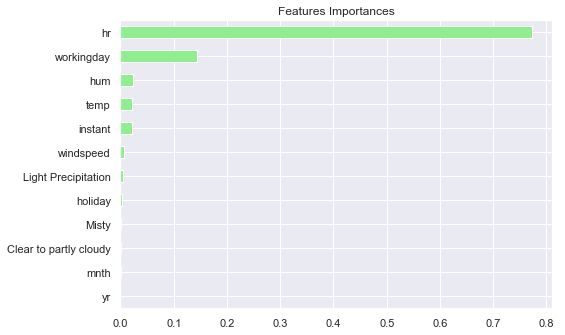

In [37]:
# Visualizing features importances

# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index= bikes.drop('cnt', axis=1).columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()


# hr and workingday are the most important features according to rf. 
# The importances of these two features add up to more than 90%!

# Chapter 4 - Boosting

#### Exercício 1 - AdaBoost

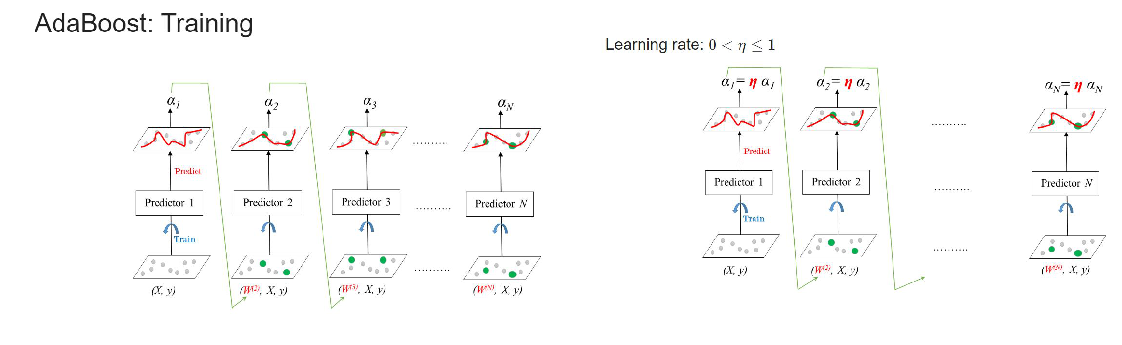

AdaBoost training: N predictors in total. First, predictor 1 is trained on the initial dataset 
    (features X, labels y) and the training error for Predictor 1 is determined. This error can then be used to determine
    alpha 1 ('α1') which is Predictor's 1 coefficient. 
    Alpha 1 ('α1') is then used to determine the weights (W(2)) of the training instances for Predictor 2. Notice how the
    incorrectly predicted instances showed in green acquire higher weights. When the weighted instances are used to train
    Predictor 2, this predictor is forced to pay more attention (weight) to the incorrectly predicted instances.
    This process is repeated sequentially until the N predictors forming the ensemble are trained.
    
An important parameter used in training is the learning rate 'η'(eta).
    It is a number between 0 and 1 and it's used to shrink the coefficient alpha ('α') of a trained predictor.
    It is important to note that there is a tradeoff between 'η'(eta) and the numbe

In [38]:
#vídeo
# Boosting

# Refers to an ensemble method in which many predictors are trained and each predictor learns from errors of its predecessor
# Ensemble method combining several weak learners to form a strong learner.

# Weak learner: Model doing slightly better than random guessing. Example: Decision stump (CART whose maximum depth is 1)

# Boosting
#  - Train an ensemble of predictors sequentially.
#  - Each predictor tries to correct its predecessor.
#  - Most popular boosting methods:
#    - AdaBoost
#    - Gradient Boosting.


# Adaboost ----> Adaptive Boosting

# Each predictor pays more attention to the instances wrongly predicted by its predecessor.
# Achieved by changing the weights of training instances.
# Each predictor is assigned a coefficient alpha - 'α'.
# alpha ('α') depends on the predictor's training error.

################################################################
plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "adaboost_training.jpg") 
plt.axis('off')
plt.imshow(image)

plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "adaboost_learning_rate.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-1, right=2.5, top=1, wspace=0.1, hspace=0)
plt.show()

print("""AdaBoost training: N predictors in total. First, predictor 1 is trained on the initial dataset 
    (features X, labels y) and the training error for Predictor 1 is determined. This error can then be used to determine
    alpha 1 ('α1') which is Predictor's 1 coefficient. 
    Alpha 1 ('α1') is then used to determine the weights (W(2)) of the training instances for Predictor 2. Notice how the
    incorrectly predicted instances showed in green acquire higher weights. When the weighted instances are used to train
    Predictor 2, this predictor is forced to pay more attention (weight) to the incorrectly predicted instances.
    This process is repeated sequentially until the N predictors forming the ensemble are trained.
    
An important parameter used in training is the learning rate 'η'(eta).
    It is a number between 0 and 1 and it's used to shrink the coefficient alpha ('α') of a trained predictor.
    It is important to note that there is a tradeoff between 'η'(eta) and the number of estimators.
    A smaller value of 'η'(eta) should be compensated by a big number of estimators.
    
    Prediction:
        Classification: Weighted majority voting   |   Regression: Weighted average.""")

# AdaBoost: Prediction

# Classification:
#  - Weighted majority voting.
#  - In sklearn: AdaBoostClassifier.

# Regression:
#  - Weighted average.
#  - In sklearn: AdaBoostRegressor.

print("""\n--> The individual predictors need not to be CART's. However CART's are used most of the time in boosting
    due to their high variance.""")
##################################################################

# AdaBoost Classification in sklearn (Breast Cancer dataset)
wbc = pd.read_csv(data_folder + "wbc.csv")

X = wbc[['radius_mean', 'concave points_mean']].values
y = wbc.diagnosis.values
X_trans = wbc.drop(['diagnosis', 'Unnamed: 32'], axis=1).values
y_trans = np.array([1 if i == 'M' else 0 for i in y])    # converti para 1's ('M') e 0's ('F')

# Import models and utility functions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3, stratify=y, random_state=SEED)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)

# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100, learning_rate=1)   

# AdaBoostClassifier
# ---> 'base_estimator' : (default=None). If None, then the base estimator is DecisionTreeClassifier(max_depth=1)
# ---> 'learning_rate' : (default=1.)

# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)

# Predict the test set probabilities of obtaining the positive class in the test set
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

# Print adb_clf_roc_auc_score
print('\nAdaBoostClassifier ROC AUC score: {:.3f}'.format(adb_clf_roc_auc_score))

print("\nAdaBoostClassifier Accuracy score:", accuracy_score(y_test, adb_clf.predict(X_test)))

#### 
dt_2 = DecisionTreeClassifier(random_state=SEED)
dt_2.fit(X_train, y_train)
print("DecisionTreeClassifier Accuracy score:", accuracy_score(y_test, dt_2.predict(X_test)), " (max_depth=None)")


Exercício 2

In [39]:
# Define the AdaBoost classifier

# Indian Liver Patient dataset
ilpd = pd.read_csv(data_folder + "indian_liver_patient_preprocessed.csv")
y = ilpd['Liver_disease'].values
X = ilpd.drop('Liver_disease', axis=1).values

from sklearn.model_selection import train_test_split
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)


# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, learning_rate=1, random_state=1)
ada

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
          learning_rate=1, n_estimators=180, random_state=1)

Exercício 3

In [40]:
# Train the AdaBoost classifier

# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:, 1]

ada.predict_proba(X_test)[:5]

array([[0.47572042, 0.52427958],
       [0.31602193, 0.68397807],
       [0.42680467, 0.57319533],
       [0.38282395, 0.61717605],
       [0.36540715, 0.63459285]])

Exercício 4

In [41]:
# Evaluate the AdaBoost classifier

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

# This untuned AdaBoost classifier achieved a ROC AUC score of 0.78!

ROC AUC score: 0.78


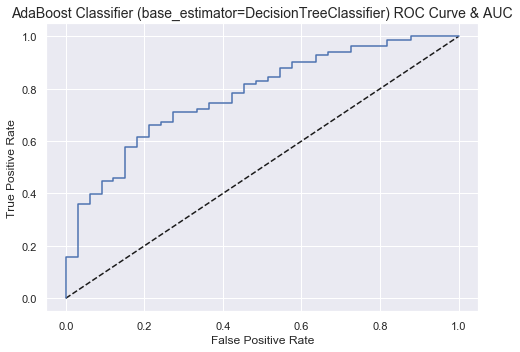

In [42]:
########### meu
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AdaBoost Classifier (base_estimator=DecisionTreeClassifier) ROC Curve & AUC", fontsize=14)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

In [43]:
# Comparação entre Classificadores

print("AdaBoostClassifier Accuracy score:", accuracy_score(y_test, ada.predict(X_test)))
print("\nDecisionTreeClassifier Accuracy score:", accuracy_score(y_test, dt.fit(X_train, y_train).predict(X_test)))
bc = BaggingClassifier(base_estimator=dt, n_estimators=180, oob_score=True, random_state=1)
print("BaggingClassifier Accuracy score:", accuracy_score(y_test, bc.fit(X_train, y_train).predict(X_test)))
rf = RandomForestClassifier(max_depth=2, n_estimators=180, random_state=1)
print("RandomForestClassifier Accuracy score:", accuracy_score(y_test, rf.fit(X_train, y_train).predict(X_test)))
logreg = LogisticRegression(solver='lbfgs', max_iter=100000, random_state=1)
print("LogisticRegression Accuracy score:", accuracy_score(y_test, logreg.fit(X_train, y_train).predict(X_test)))
knn = KNeighborsClassifier()
print("KNeighborsClassifier Accuracy score:", accuracy_score(y_test, knn.fit(X_train, y_train).predict(X_test)))
classifiers = [('Logistic Regression', logreg), ('K Nearest Neighbours', knn), ('Classification Tree', dt), 
              ('AdaBoostClassifier', ada), ('BaggingClassifier', bc), ('RandomForestClassifier', rf)]
vc = VotingClassifier(estimators=classifiers)
print("VotingClassifier Accuracy score:", accuracy_score(y_test, vc.fit(X_train, y_train).predict(X_test)))

AdaBoostClassifier Accuracy score: 0.7413793103448276

DecisionTreeClassifier Accuracy score: 0.6293103448275862
BaggingClassifier Accuracy score: 0.7068965517241379
RandomForestClassifier Accuracy score: 0.7155172413793104
LogisticRegression Accuracy score: 0.7241379310344828
KNeighborsClassifier Accuracy score: 0.7327586206896551
VotingClassifier Accuracy score: 0.7241379310344828


#### Exercício 5 - Gradient Boosting

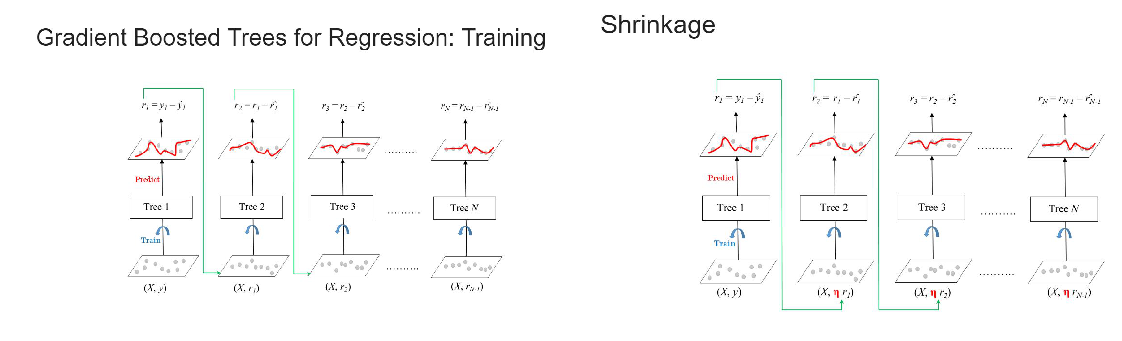

The ensemble consists on N predictors (Trees -> Gradient Boosted Trees). Tree 1 is trained using the features 
matrix X and the dataset labels y. The predictions, labeled y1^, are used to determine the training set residual errors, r1.
Tree 2 is then trained using the features matrix X and the residuals r1 as labels. The predicted residuals (r1^) are then
used to determine the residuals of residuals, labeled r2. This process is repeated until all N Trees are trained.

A important parameter used in Gradient training Boosted Trees is shrinkage, given by 'η'(eta).
Similarly as in AdaBoost, there is a tradeoff between 'η'(eta) and the number of estimators. Decreasing the learning rate
needs to be compensated by a big number of estimators/trees.

Test set RMSE: 4.01


In [44]:
#vídeo

# Gradient Boosting has a proven track record of winning many machine learning competitions

# Gradient Boosted Trees
#  - Sequential correction of predecessor's errors.
#  - Does not tweak the weights of training instances. (in contrast to AdaBoost)
#  - instead ----> Fit each predictor is trained using its predecessor's residual errors as labels.

#  - Gradient Boosted Trees: a CART is used as a base learner.

plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "gradient_boosting_training.jpg") 
plt.axis('off')
plt.imshow(image)

plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "gradient_boosting_shrinkage.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.6, right=2.5, top=1, wspace=0.1, hspace=0)
plt.show()

print("""The ensemble consists on N predictors (Trees -> Gradient Boosted Trees). Tree 1 is trained using the features 
matrix X and the dataset labels y. The predictions, labeled y1^, are used to determine the training set residual errors, r1.
Tree 2 is then trained using the features matrix X and the residuals r1 as labels. The predicted residuals (r1^) are then
used to determine the residuals of residuals, labeled r2. This process is repeated until all N Trees are trained.

A important parameter used in Gradient training Boosted Trees is shrinkage, given by 'η'(eta).
Similarly as in AdaBoost, there is a tradeoff between 'η'(eta) and the number of estimators. Decreasing the learning rate
needs to be compensated by a big number of estimators/trees.\n""")

# Gradient Boosted Trees: Prediction

# Regression:
#    y_pred = y1 + η*r1 + η*r2 + ... + η*rN
# In sklearn: GradientBoostingRegressor.

# Classification: ----> In sklearn: GradientBoostingClassifier. (não vamos ver aqui)

##################################################################


# Gradient Boosting in sklearn (auto dataset)

auto = pd.read_csv(data_folder + "auto.csv")
auto_dummies = pd.get_dummies(auto)
y = auto_dummies['mpg'].values
X = auto_dummies.drop('mpg', axis=1).values

# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)

# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = gbt.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))


Exercício 6

In [45]:
# Define the GB regressor

# Bike rental demand in the Capital Bikeshare program in Washington, D.C dataset
bikes = pd.read_csv(data_folder + 'bikes.csv')
y = bikes['cnt'].values
X = bikes.drop('cnt', axis=1).values

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=2)
gb

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=2, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

Exercício 7

In [46]:
# Train the GB regressor

from sklearn.model_selection import train_test_split

# The dataset is split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

Exercício 8

In [47]:
# Evaluate the GB regressor

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test ** 0.5

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 49.796


#### Exercício 9 - Stochastic Gradient Boosting (SGB)

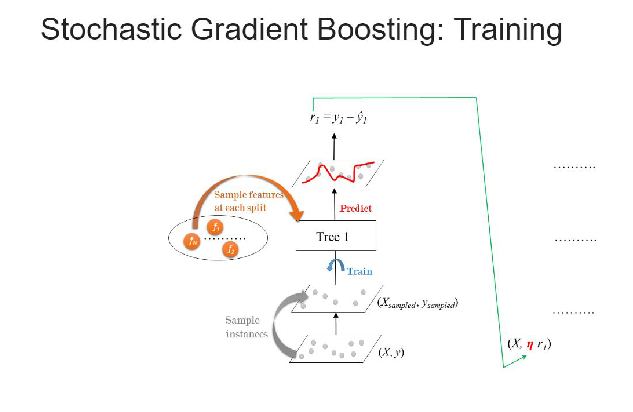

Test set RMSE: 3.95


In [48]:
#vídeo

# ---> Gradient Boosting: Cons
# GB involves an exaustive search procedure.
# Each CART is trained to find the best split points and features.
# May lead to CARTs using the same split points and maybe the same features.

# --> Stochastic Gradient Boosting
# Each tree is trained on a random subset of rows of the training data.
# The sampled instances (40%-80% of the training set) are sampled without replacement.
# Features are sampled (without replacement) when choosing split points.
# Result: further ensemble diversity.
# Effect: adding further variance to the ensemble of trees.

image = plt.imread(data_folder + "stochastic_gradient_boosting.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.3, right=1.5, top=1, wspace=0, hspace=0)
plt.show()
################################################################

# Stochastic Gradient Boosting in sklearn (auto dataset)

auto = pd.read_csv(data_folder + "auto.csv")
auto_dummies = pd.get_dummies(auto)
y = auto_dummies['mpg'].values
X = auto_dummies.drop('mpg', axis=1).values

# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a stochastic GradientBoostingRegressor 'sgbt'
sgbt = GradientBoostingRegressor(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=SEED)

# subsample=0.8 ---> each tree samples 80% of the data for training
# max_features=0.2 ---> each tree uses 20% of the available features to perform the best split

# Fit 'sgbt' to the training set
sgbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = sgbt.predict(X_test)

# Evaluate test set RMSE 'rmse_test'
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print 'rmse_test'
print('Test set RMSE: {:.2f}'.format(rmse_test))

Exercício 10

In [49]:
# Regression with SGB

# Bike rental demand in the Capital Bikeshare program in Washington, D.C dataset
bikes = pd.read_csv(data_folder + 'bikes.csv')
y = bikes['cnt'].values
X = bikes.drop('cnt', axis=1).values

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, subsample=0.9, max_features=0.75, n_estimators=200, random_state=2)
sgbr

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=0.75,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=2, subsample=0.9, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

Exercício 11

In [50]:
# Train the SGB regressor

from sklearn.model_selection import train_test_split

# The dataset is split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

Exercício 12

In [51]:
# Evaluate the SGB regressor

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test ** 0.5

# Print RMSE
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

# The stochastic gradient boosting regressor achieves a lower test set RMSE than the gradient boosting regressor (49.796)

Test set RMSE of sgbr: 47.944


# Chapter 5 - Model Tuning


#### Exercício 1 - Tuning a CART's Hyperparameters

In [52]:
#vídeo

# Hyperparameters

# Machine learning model:
# - parameters: learned from data
#     CART example: split-point of a node, split-feature of a node, ...
# - hyperparameters: not learned from data, set prior to training
#    CART example: max_depth, min_samples_leaf, splitting criterion ...

# Approaches to hyperparameter tuning:
#  - Grid Search ---> só vamos ver este
#  - Random Search
#  - Bayesian Optimization
#  - Genetic Algorithms
#  - ....

# Inspecting the hyperparameters of a CART in sklearn

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Set seed to 1 for reproducibility
SEED = 1

# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state=SEED)

# Print out 'dt's hyperparameters
print("DecisionTreeClassifier hyperparameters:\n", dt.get_params())   
# -----> we're only going to optimize 'max_depth', 'max_features' and 'min_samples_leaf'
################################################################################

# Grid search CV in sklearn (Breast Cancer dataset)

wbc = pd.read_csv(data_folder + "wbc.csv")
y = wbc.diagnosis.values
X_trans = wbc.drop(['diagnosis', 'Unnamed: 32'], axis=1).values
y_trans = np.array([1 if i == 'M' else 0 for i in y])    # converti para 1's ('M') e 0's ('F')

# Split data into 70% train and 30% test & fit
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3, stratify=y, random_state=SEED)

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters 'params_dt'
params_dt = {'max_depth': [3, 4, 5, 6], 'min_samples_leaf': [0.04, 0.06, 0.08], 'max_features': [0.2, 0.4, 0.6, 0.8]}

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='accuracy', cv=10, n_jobs=-1)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_dt'
print('\nBest hyerparameters:', grid_dt.best_params_)

# Extract best CV score from 'grid_dt'
print('\nBest CV accuracy:', grid_dt.best_score_)

# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_
print("\nbest model:", best_model)

# Evaluate test set accuracy
test_acc = best_model.score(X_test, y_test)

# Print test set accuracy
print("\nTest set accuracy of best model: {:.3f}".format(test_acc))

# check
round(accuracy_score(y_test, grid_dt.best_estimator_.fit(X_train, y_train).predict(X_test)), 3)

DecisionTreeClassifier hyperparameters:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 1, 'splitter': 'best'}

Best hyerparameters: {'max_depth': 3, 'max_features': 0.4, 'min_samples_leaf': 0.06}

Best CV accuracy: 0.9422110552763819

best model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=0.4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.06, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

Test set accuracy of best model: 0.936


0.936

Exercício 2

In [53]:
# Tree hyperparameters

ilpd = pd.read_csv(data_folder + "indian_liver_patient_preprocessed.csv")
y = ilpd['Liver_disease'].values
X = ilpd.drop('Liver_disease', axis=1).values

# Split data into 80% train and 20% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
# stratify=y ---> so that the train and test sets have the same proportion of class labels

from sklearn.tree import DecisionTreeClassifier

# Your task is to tune the hyperparameters of a classification tree. Given that this dataset is imbalanced, you'll be 
# using the ROC AUC score as a metric instead of accuracy.

# We have instantiated a DecisionTreeClassifier and assigned to dt with sklearn's default hyperparameters. 
# You can inspect the hyperparameters of dt in your console.

dt = DecisionTreeClassifier()
dt

# Which of the following is not a hyperparameter of dt?

# a) min_impurity_decrease
# b) min_weight_fraction_leaf
# c) min_features <------------ (True)
# d) splitter

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Exercício 3

In [54]:
# Set the tree's hyperparameter grid
params_dt = {'max_depth': [2, 3, 4], 'min_samples_leaf':[0.12, 0.14, 0.16, 0.18]}

Exercício 4

In [55]:
# Search for the optimal tree

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='roc_auc', cv=5, n_jobs=-1, iid=False)


Exercício 5

In [56]:
# Evaluate the optimal tree

# fit to the training set
grid_dt.fit(X_train, y_train)

# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = grid_dt.predict_proba(X_test)[:, 1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

print("\nuntuned Test set ROC AUC score:", roc_auc_score(y_test, dt.fit(X_train, y_train).predict_proba(X_test)[:, 1]))

Test set ROC AUC score: 0.614

untuned Test set ROC AUC score: 0.5191675794085433


#### Exercício 6 - Tuning a RandomForests Hyperparameters

In [57]:
#vídeo

# Random Forests Hyperparameters:
#  - CART hyperparameters
#  - number of estimators
#  - bootstrap (True or False)
#  - ....

# Hyperparameter tuning is expensive:
#  - computationally expensive,
#  - sometimes leads to very slight improvement,
#  ---->  we need to weight the impact of tuning on the whole project

# Inspecting RF Hyperparameters in sklearn

# Import RandomForestRegressor 
from sklearn.ensemble import RandomForestRegressor

# Set seed for reproducibility
SEED = 1

# Instantiate a random forests regressor 'rf' 
rf = RandomForestRegressor(random_state=SEED)

# Inspect rf' s hyperparameters    ---> we'll view: 'n_estimators' + 'max_depth' + 'min_samples_leaf' and 'max_features'
rf.get_params()      

###################################################

# GridSearchCV in sklearn (auto dataset)
auto = pd.read_csv(data_folder + "auto.csv")
auto_dummies = pd.get_dummies(auto)
y = auto_dummies['mpg'].values
X = auto_dummies.drop('mpg', axis=1).values

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

# Split dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state=SEED)

# Define a grid of hyperparameter 'params_rf'
params_rf = {'n_estimators': [300, 400, 500], 'max_depth': [4, 6, 8], 'min_samples_leaf': [0.1, 0.2],
             'max_features': ['log2', 'sqrt']}

# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1,
                      iid=False)
# verbose controls verbosity. The higher its value the more messages are printed during fitting

# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train)   
      # ---> now, with verbose, the output shows messages related to grid fitting as well as the obtained optimal model

    
    
# Extract best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_

print('Best hyerparameters:\n', best_hyperparams)

# Extract best model from 'grid_rf'
best_model = grid_rf.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('\nTest set RMSE of rf: {:.2f}'.format(rmse_test)) 
# untuned
y_pred_rf_untuned = RandomForestRegressor(random_state=SEED, n_estimators=10).fit(X_train, y_train).predict(X_test)
print('untuned Test set RMSE of rf: {:.2f}'.format(MSE(y_test, y_pred_rf_untuned)**(1/2))) 

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   17.2s finished


Best hyerparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 400}

Test set RMSE of rf: 3.89
untuned Test set RMSE of rf: 3.99


Exercício 7

In [58]:
# Random forests hyperparameters

# Bike rental demand in the Capital Bikeshare program in Washington, D.C dataset
bikes = pd.read_csv(data_folder + 'bikes.csv')
y = bikes['cnt'].values
X = bikes.drop('cnt', axis=1).values

# Instantiate rf regressor
rf = RandomForestRegressor()
rf

# Which of the following is not a hyperparameter of rf?

# a) min_weight_fraction_leaf
# b) criterion
# c) learning_rate  ---> (True) 
# d) warm_start

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Exercício 8

In [59]:
# Set the hyperparameter grid of RF
params_rf = {'n_estimators':[100, 350, 500], 'max_features':['log2', 'auto', 'sqrt'], 'min_samples_leaf':[2, 10, 30]}

Exercício 9

In [60]:
# Search for the optimal forest

# Note that because grid search is an exhaustive search process, it may take a lot time to train the model. 
# Here you'll only be instantiating the GridSearchCV object without fitting it to the training set. 

# Import models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf & fit
grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Split dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   22.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 350, 500], 'max_features': ['log2', 'auto', 'sqrt'], 'min_samples_leaf': [2, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

Exercício 10

In [61]:
# Evaluate the optimal forest

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Split dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred) ** 0.5

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 


Test RMSE of best model: 35.311


#### Exercício 11 - end

In [62]:
#vídeo

# Fim